##  Case study - Dream Housing Finance

It is a classification problem where we have to predict whether a loan demand would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variable(s). This is a binary classification problem - No 0 and Yes 1.


In [253]:
# Let's include general porpuses libraries 

import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline

## Data
For this practice problem, we have been given two different CSV files: train and test. 

Train file will be used for training the model, i.e. the model will learn from this file. It contains all the independent variables and the target variable.
Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data. The idea is to define with the test data if new customers are eligible for a loan or not.

In [254]:
train = pd.read_csv('train_loan.csv')
test  = pd.read_csv('test_loan.csv') 

In [255]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Let’s make a copy of train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.

In [256]:
train_original = train.copy()
test_original = test.copy()

In this section, we will look at the structure of the train and test datasets. Firstly, we will check the features present in our data and then we will look at their data types.

In [257]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [258]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


Features coincide in both train and test datasets

Related to datatypes, data types differs in column 'CoapplicantIncome' from train to test datasets: The one in train is float and the one in test is int. Decimals difference is not important in that case. We can already notice that there is some missing data.

In [259]:
## Lets check the number of samples 
train.shape,test.shape

((614, 13), (367, 12))

We have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in test dataset. Test dataset have one column less as the label of loan eligibility is missing.

### Univariate Analysis - Let's analyse one by one the different features and target variable

We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

Frequency table of a variable will give us the count of each category in that variable.

In [260]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [261]:
# Normalise can be set to true to print the proportions instead of Numbers.
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

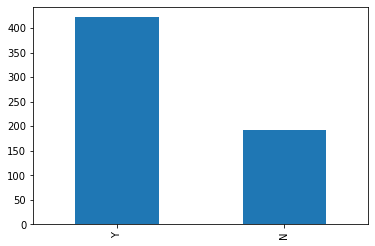

In [262]:
train['Loan_Status'].value_counts().plot.bar()

The loan of 422 (around 69%) people out of 614 was approved. The class is unbalanced.

Now let's visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

* Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
* Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
* Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

Let’s visualize the categorical and ordinal features first.

<AxesSubplot:title={'center':'Credit_History'}>

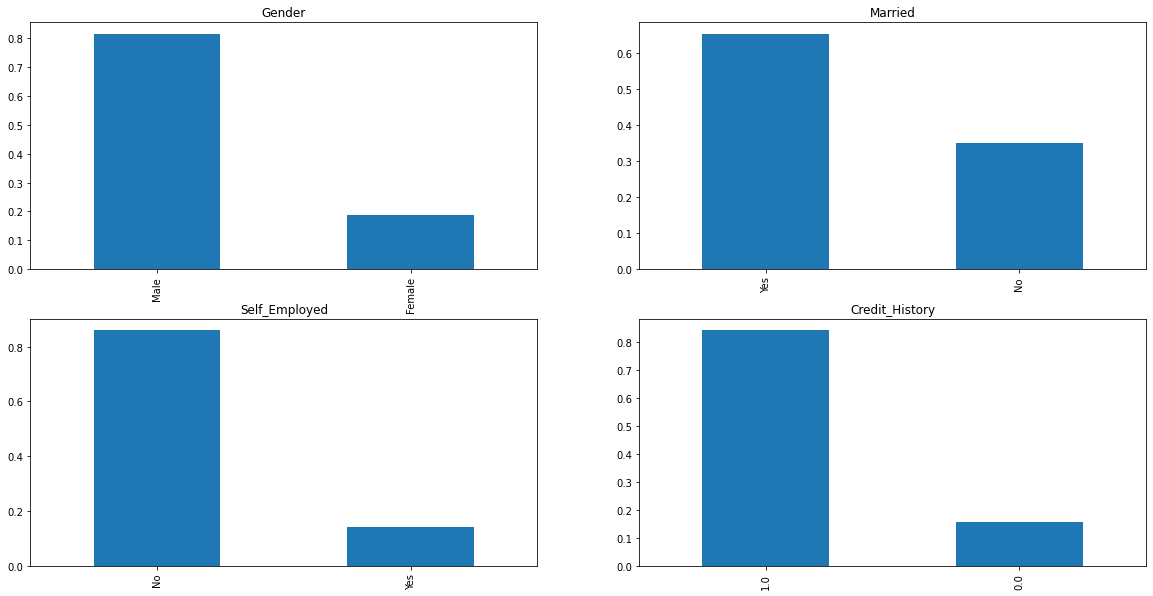

In [263]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History')

It can be inferred from the above bar plots that:

* 80% applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* Around 15% applicants in the dataset are self employed.
* Around 85% applicants have a credit history that meet the guidelines.

Now let’s visualize the ordinal variables.

<AxesSubplot:title={'center':'Property_Area'}>

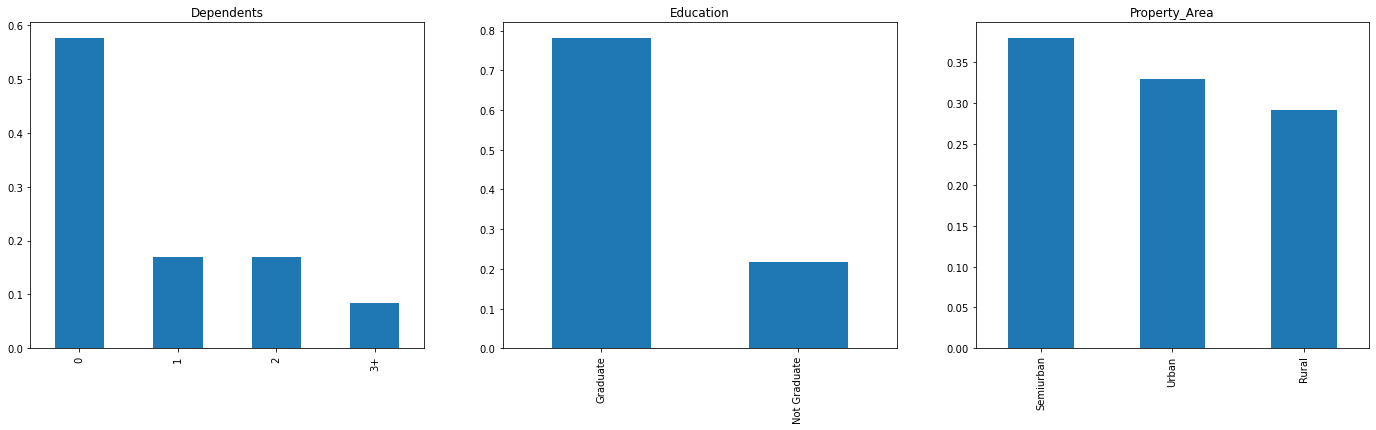

In [264]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Property_Area')

Following inferences can be made from the above bar plots:

* Most of the applicants don’t have any dependents.
* Around 80% of the applicants are Graduate.
* Most of the applicants are from Semiurban area.

Let's also visualise Numerical data:
- 'ApplicantIncome'
- 'CoApplicantIncome'
- 'Loan_amount'
- 'Loan_amount_term'

We can visualize their probability density function and their boxplot, to visually check if the distribution is normal and there are outliers.

C:\Users\Francisco-Martin.NAV\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


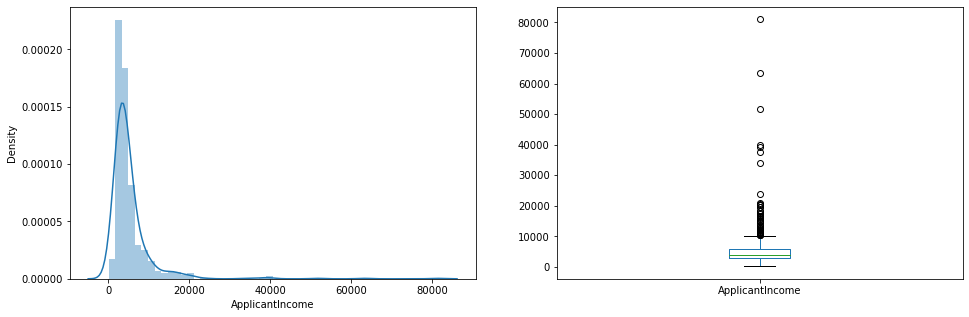

In [265]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

It can be inferred that most of the data in the distribution of applicant income is in the right side which means it is not normally distributed. 

The boxplot confirms the presence of a lot of outliers/extreme values, which can be related to the society disparity regarding salary. 

If we do a box plot in ApplicantIncome depending on Education, we can see how Graduated people have higher salaries than people without a degree. 

Text(0.5, 0.98, '')

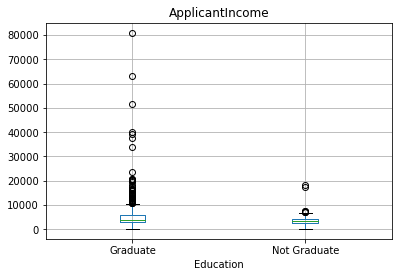

In [266]:
train.boxplot(column='ApplicantIncome', by ='Education')
plt.suptitle("")

Let’s look at the Coapplicant income distribution.

C:\Users\Francisco-Martin.NAV\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


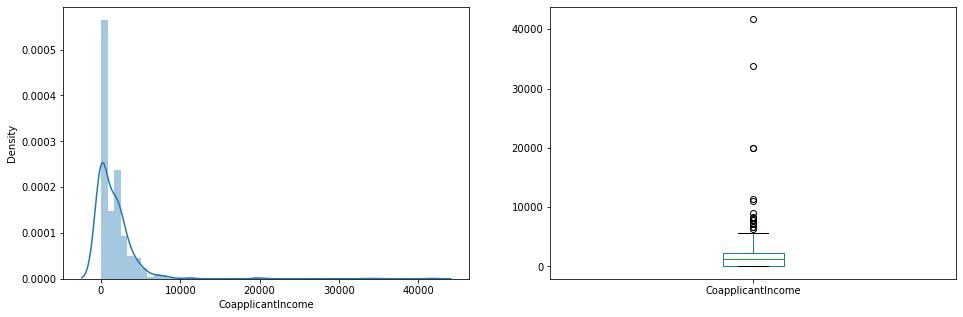

In [267]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Let’s look at the distribution of LoanAmount variable.

C:\Users\Francisco-Martin.NAV\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


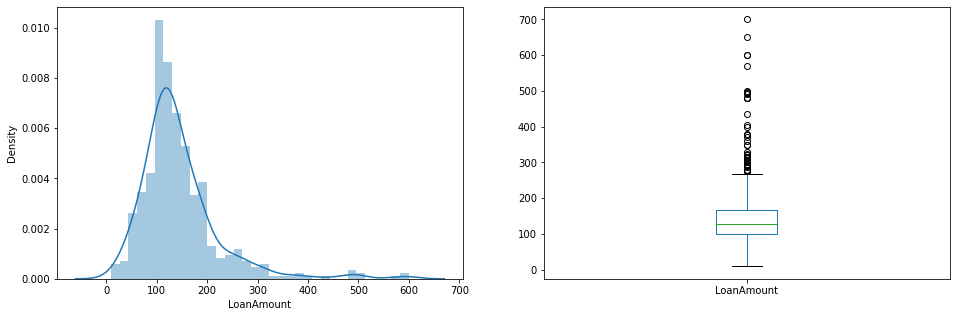

In [268]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

We see a lot of outliers in this variable and the distribution is not normal.

Let’s look at the distribution of LoanAmountTerm variable.

C:\Users\Francisco-Martin.NAV\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


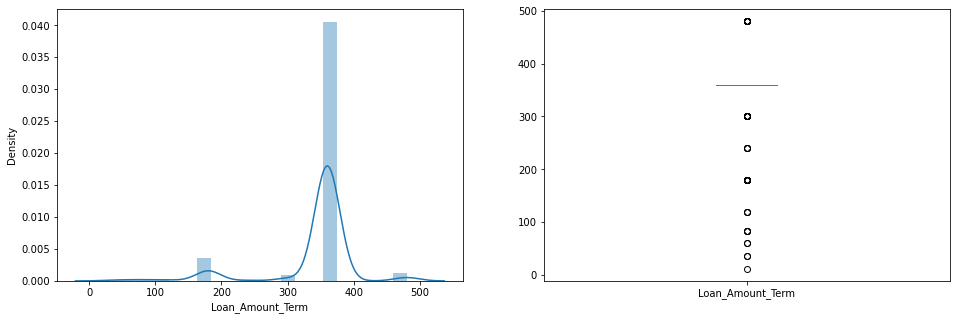

In [269]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df['Loan_Amount_Term']);

plt.subplot(122)
train['Loan_Amount_Term'].plot.box(figsize=(16,5))

plt.show()

This variable is not normally distributed. Most of the loans given are in a 360 months termn as we can see below.

<AxesSubplot:title={'center':'Loan_Amount_Term'}>

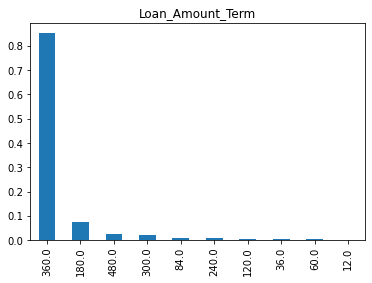

In [270]:
train['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title='Loan_Amount_Term')

Now we would like to know how well each feature correlate with Loan Status. For this, lets do a Bivariate analysis.

## Bivariate Analysis

Let's start with categorical variables: 

<AxesSubplot:xlabel='Loan_Status', ylabel='prop'>

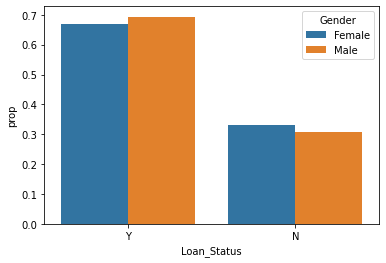

In [271]:
prop=train['Loan_Status'].groupby(train['Gender']).value_counts(normalize = True).rename('prop').reset_index()
sns.barplot(x="Loan_Status", y="prop", hue="Gender", data=prop)

From this results, there is no difference in loan eligibility regarding the Gender. 

<AxesSubplot:xlabel='Loan_Status', ylabel='prop'>

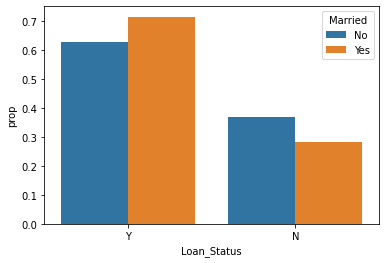

In [272]:
prop=train['Loan_Status'].groupby(train['Married']).value_counts(normalize = True).rename('prop').reset_index()
sns.barplot(x="Loan_Status", y="prop", hue="Married", data=prop)

Married people have slightly more chances of getting a loan.

<AxesSubplot:xlabel='Loan_Status', ylabel='prop'>

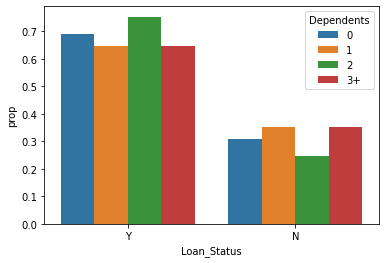

In [273]:
prop=train['Loan_Status'].groupby(train['Dependents']).value_counts(normalize = True).rename('prop').reset_index()
sns.barplot(x="Loan_Status", y="prop", hue="Dependents", data=prop)

It seems that applicants with two dependents have slightly more chances of getting a loan.

<AxesSubplot:xlabel='Loan_Status', ylabel='prop'>

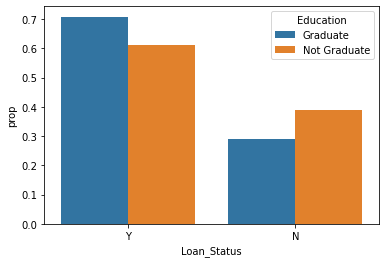

In [274]:
prop=train['Loan_Status'].groupby(train['Education']).value_counts(normalize = True).rename('prop').reset_index()
sns.barplot(x="Loan_Status", y="prop", hue="Education", data=prop)

Graduated people have slightly more changes of getting a loan. We guess is related to the higher salary concerning people with a degree. 

<AxesSubplot:xlabel='Loan_Status', ylabel='prop'>

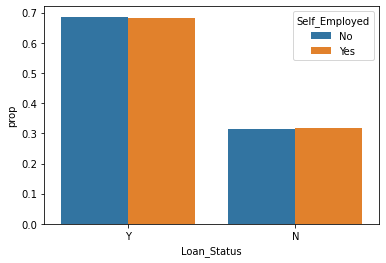

In [275]:
prop=train['Loan_Status'].groupby(train['Self_Employed']).value_counts(normalize = True).rename('prop').reset_index()
sns.barplot(x="Loan_Status", y="prop", hue="Self_Employed", data=prop)

There is no difference in loan eligibility concerning the Self employed status.   

<AxesSubplot:xlabel='Loan_Status', ylabel='prop'>

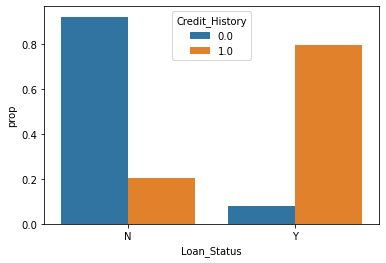

In [276]:
prop=train['Loan_Status'].groupby(train['Credit_History']).value_counts(normalize = True).rename('prop').reset_index()
sns.barplot(x="Loan_Status", y="prop", hue="Credit_History", data=prop)

Loan egilibility is much bigger for people with a good credit history.

Let's check now the numerical variables. Let's see first the ApplicantIncome.


<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

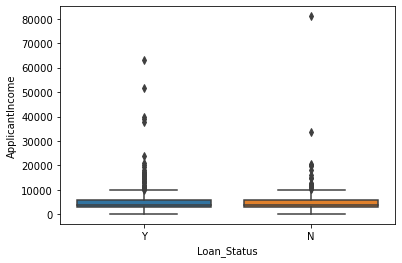

In [277]:
sns.boxplot(x="Loan_Status", y='ApplicantIncome', data=train)

It seems there is no difference in the Loan Status related to the applicant income. Let's see the CoapplicantIncome.

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

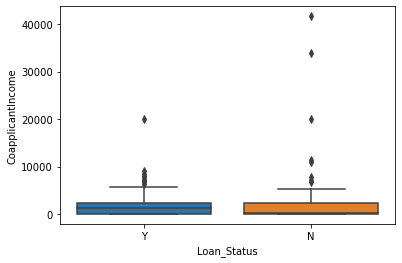

In [278]:
 sns.boxplot(x="Loan_Status", y="CoapplicantIncome", data=train)

Same thing for the coapplicant income. There are a lot of points in zero because there are applications without Coapplicant.

This information maybe only makes sense when put it together with ApplicantIncome. Lets try that: 

In [279]:
t=pd.DataFrame()
t['App_plus_coApp'] = train['CoapplicantIncome'] + train['ApplicantIncome'] 
t['Loan_Status'] = train['Loan_Status']
t = t[t['App_plus_coApp'] < 30000] ## Lets eliminate some outliers so we can see better the boxplot

<AxesSubplot:xlabel='Loan_Status', ylabel='App_plus_coApp'>

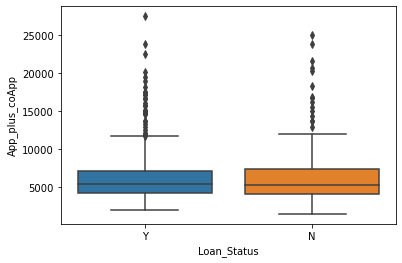

In [280]:
sns.boxplot(x="Loan_Status", y="App_plus_coApp", data=t)

No difference. Related to the loan amount:

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

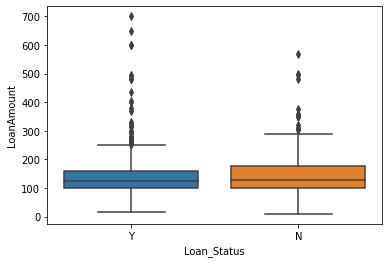

In [281]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=train)

There is no important difference either. Finally, related to the Loan term: 

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

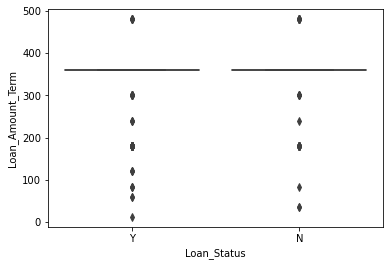

In [282]:
sns.boxplot(x="Loan_Status", y="Loan_Amount_Term", data=train)

No important difference again. It seems like all these data when analyse do not affect to the loan status. Let's calculate some other variables from these data:

The monthly loan return

<AxesSubplot:xlabel='Loan_Status', ylabel='Monthly_loan_return'>

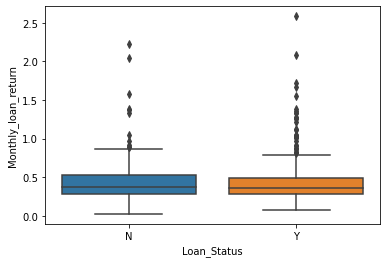

In [283]:
t['Monthly_loan_return'] = (train['LoanAmount'])/(train['Loan_Amount_Term'])
t = t[t['Monthly_loan_return'] < 4] ## We eliminate some outliers above 0.4, so we can see better the boxplot
sns.boxplot(x="Loan_Status", y="Monthly_loan_return", data=t)

It seems there is no a huge difference for the loan status, but monthly loan return follows more a normal distribution. What about this related to the applicants salary?

In [284]:
t['monthly_loan_salary_rate'] = ((train['LoanAmount']*1000)/(train['Loan_Amount_Term']))/(train['CoapplicantIncome'] + train['ApplicantIncome'])
t = t[t['monthly_loan_salary_rate'] < 0.4] ## We eliminate some outliers above 0.4, so we can see better the boxplot

<AxesSubplot:xlabel='Loan_Status', ylabel='monthly_loan_salary_rate'>

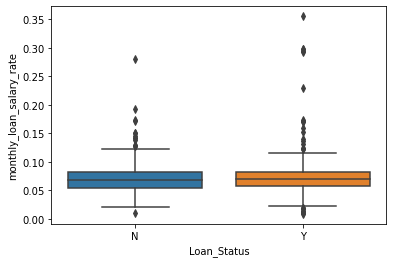

In [285]:
sns.boxplot(x="Loan_Status", y="monthly_loan_salary_rate", data=t)

No difference either. But this follows a more normal distribution. 

## Some conclusions

So the conclusions from this bivariate analysis are the following:
 - Good credit history is really important for getting a loan.
 - Married people have slightly more chances of getting a loan.
 - Same with people with 2 dependents.
 - And graduated.
 
This hypothesis should be tested, but it seems that a good target group for loans will be graduated married couples with two children and good credit history.

In the other hands, three new features were also checked: 
 - Total applicants income
 - Monthly rate loan return
 - Monthly loan salary rate
 
These will be used instead of the original numerical features. Monthly rate loan return and Monthly loan salary rate follow better a normal distribution, anyway a log function will be applied to treat the remaining outliers. But first, let's treat the missing values.

## Missing Values

After exploring all the variables in our data, we can now do missing values imputation.

Let’s list out feature-wise count of missing values.

In [286]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

- We will treat the missing values in all the features depending if the variables are categorical or numerical. For categorical features, we take the most frequent value and for numerical the median (as we have outliers). 



Let's separate features in two different groups:

In [287]:
col_num = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term']
col_cat = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

Missing values are gonne be treated in differents ways depending if features are categorical or numerical. For doing so, we use a ColumnTransformer with the two lists described above and two different pipelines:
- The pipeline for numerical uses a SimpleImputer to remplace missing_values with the median, a FunctionTransformer and a StandardScaler.
- The pipeline for categorical data uses a SimpleImputer to remplace missing_values with the most_frequent, and a OrdinalEncoder to translate categorical data in new dummy_variables. 

In [288]:
from sklearn.compose import ColumnTransformer

# on utilisera un pipeline pour enchaîner les traitements
from sklearn.pipeline import make_pipeline

# les méthodes de prétraitement
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, FunctionTransformer


We create a function for translating our numerical features on three new ones applying a log to "normalize them". Then this user-defined function can be used in a pipeline by using a FunctionTransformer.  This is the function calculating the Total applicants income, Monthly rate loan return and Monthly loan salary rate from the original data, once missing values are imputed.
 

In [289]:
def trans_func(inputNumData):
    inputNumData = pd.DataFrame(inputNumData)
    aux = pd.DataFrame()
    aux[0] = np.log(inputNumData.iloc[:,0] + inputNumData.iloc[:,1]) #
    aux[1] = np.log(inputNumData.iloc[:,2]/inputNumData.iloc[:,3]) #(train['LoanAmount'])/(train['Loan_Amount_Term'])
    aux[2] = np.log(((inputNumData.iloc[:,2]*1000)/(inputNumData.iloc[:,3]))/(inputNumData.iloc[:,1]  + inputNumData.iloc[:,0])) #((train['LoanAmount']*1000)/(train['Loan_Amount_Term']))/(train['CoapplicantIncome'] + train['ApplicantIncome'])
    return aux

In [290]:
transfo_num = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='median'), FunctionTransformer(trans_func), StandardScaler())
transfo_cat = make_pipeline(SimpleImputer(missing_values=np.nan,strategy='most_frequent'), OrdinalEncoder())

preparation = ColumnTransformer(
    transformers=[
        ('quanti', transfo_num , col_num),
        ('quali', transfo_cat , col_cat)])

In [291]:
##Let's fit, transform the data and put it in a new pandas DataFrame
train_processed = pd.DataFrame(preparation.fit_transform(train))
train_processed.columns = ['Total Income', 'Monthly rate loan return', 'Monthly loan salary rate'] + col_cat 
train_processed.head()

,Total Income,Monthly rate loan return,Monthly loan salary rate,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,0.008468,-0.156362,-0.186185,1.0,0.0,0.0,0.0,0.0,1.0,2.0
1,0.082903,-0.156362,-0.267609,1.0,1.0,1.0,0.0,0.0,1.0,0.0
2,-1.217363,-1.332093,-0.175575,1.0,1.0,0.0,0.0,1.0,1.0,2.0
3,-0.301273,-0.270919,0.023021,1.0,1.0,0.0,1.0,0.0,1.0,2.0
4,0.055266,0.015336,-0.043104,1.0,0.0,0.0,0.0,0.0,1.0,2.0


In [292]:
##Let's check there are no missing values
train_processed.isnull().sum()

Total Income                0
Monthly rate loan return    0
Monthly loan salary rate    0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
Credit_History              0
Property_Area               0
dtype: int64

The data is clean and standarized, lets check now the "normality" of our new three numerical features:

C:\Users\Francisco-Martin.NAV\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


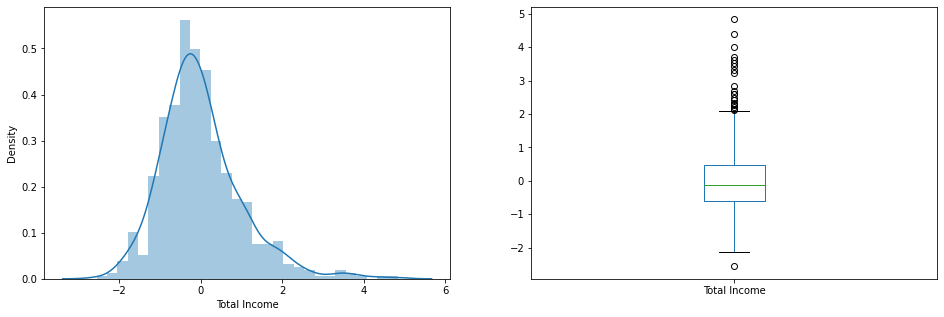

In [293]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train_processed.iloc[:,0]);

plt.subplot(122)
train_processed.iloc[:,0].plot.box(figsize=(16,5))

plt.show()

C:\Users\Francisco-Martin.NAV\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


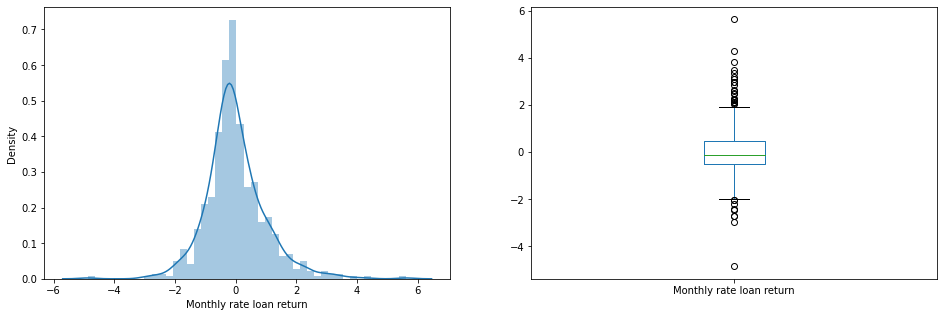

In [294]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train_processed.iloc[:,1]);

plt.subplot(122)
train_processed.iloc[:,1].plot.box(figsize=(16,5))

plt.show()

C:\Users\Francisco-Martin.NAV\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


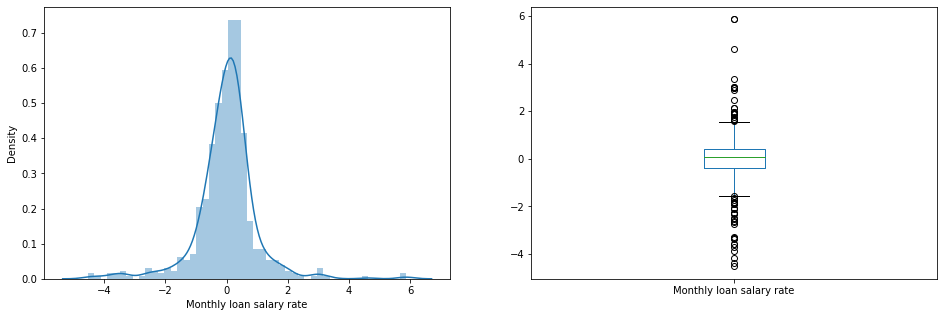

In [295]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train_processed.iloc[:,2]);

plt.subplot(122)
train_processed.iloc[:,2].plot.box(figsize=(16,5))

plt.show()

Our new three features follow more a normal distribution and outliers are not that far from 1.5*IQR limit.

Data is ready to be used in a model.

### Model Selection

Once the data is clean, let's it to train some machine learning models for a classification problem. GridSearchCV will be used to get the parameters of different classification models with 5-fold cross-validation.

Our features and target variable for the training  are the followings: 

In [296]:
X_train = np.asarray(train_processed)
### The target variable must be transformed to numerical
loan_status_num = {'N': 0, 'Y': 1}
y_train = np.asarray(train_original['Loan_Status'].map(loan_status_num)).reshape(-1,1)
print("The dimensions of the training features are:", X_train.shape)
print("The dimensions of the training target are:", y_train.shape)

The dimensions of the training features are: (614, 10)
The dimensions of the training target are: (614, 1)


Our features for the test are the followings: 

In [297]:
## We reuse the transformer with the test dataset
test_processed = pd.DataFrame(preparation.fit_transform(test))

In [298]:
X_test = np.asarray(test_processed)
print("The dimensions of the target features are:", X_test.shape)

The dimensions of the target features are: (367, 10)


Once we have the data ready to be exploited in a model, let's use gridSearchCV to find the best Hyperparameters of three different models:
- Logistic regression
- Support Vector Machine
- Random Forest

Given that the database is unbalanced, we will used the area under the roc curve as classification metric to choose the best model:

### Logistic Regression

In [299]:
from sklearn.model_selection import GridSearchCV

In [300]:
from sklearn.linear_model import LogisticRegression


# Create param grid with hiperparameters within the LogisticRegression

param_grid = [
    {'penalty' : ['l1', 'l2'],  ## These are two different ways of doing regularization, l1 is lasso regression and l2 ridge regression
    'C' : [0.1, 0.2, 0.4, 0.7, 1, 10, 100]}]  ##  C is the inverse of the regularization

# Create grid search object, cross validation of 5, n_jobs=-1 to consume all availaible resources, and scoring area under 
# curve roc

clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring='roc_auc')

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.7s finished
C:\Users\Francisco-Martin.NAV\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


The best hiperparameters for the Logistic Regressor are:

In [301]:
best_clf.best_params_

{'C': 0.1, 'penalty': 'l2'}

The best score is:

In [302]:
best_clf.best_score_

0.7502858390319691

### SVC

SVC must be faster than Logistic Regression because it only uses support vector for the fit. Support vectors are the examples incorrectly classified or close to the decision boundary.

In [303]:
from sklearn.svm import SVC

param_grid = {'C': [0.1, 0.5, 1, 10, 100],  ## This is again the inverse of the regularization 
              'gamma': [0.5, 0.7, 0.9, 1], ## It controls the smoothness of the decision boundary, the lower the more smooth
              'kernel': ['rbf', 'linear']}  ## Let's try linear and non-linear kernels


clf = GridSearchCV(SVC(), param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring='roc_auc')

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 177 out of 200 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.6s finished
C:\Users\Francisco-Martin.NAV\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [304]:
best_clf.best_params_

{'C': 0.5, 'gamma': 0.5, 'kernel': 'rbf'}

In [305]:
best_clf.best_score_

0.7542430926486654

The score is similar to the one we obtained with Logistic Regression, but SVM is slightly better.

### Random Forest Classifier

In [306]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42, criterion= 'gini')

param_grid = { 
    'n_estimators': [20, 50, 200, 500], ## Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  ## The number of features to consider when looking for the best split, log2(n_features) or sqrt(n_features)
    'max_depth' : [2,4,5,6,7,8], ## Max depth of the tree
    'class_weight':[{1: w} for w in [1, 2, 4]] ## The data is unbalanced, so let's change the weihght for the class 1
}


clf = GridSearchCV(rfc, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring='roc_auc')

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 474 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.1min finished
C:\Users\Francisco-Martin.NAV\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [307]:
best_clf.best_params_

{'class_weight': {1: 4},
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [308]:
best_clf.best_score_

0.7689106060777887

Random Forest gives the best result, lets check the classification report for a stratified test from X_train, y_train (It is the only labeled data available):

In [309]:
model = best_clf.best_estimator_

In [310]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size = 0.2, stratify=y_train, random_state = 10)
print(Xtrain.shape)
print(Xtest.shape)

(491, 10)
(123, 10)


In [311]:
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

<ipython-input-311-d76eb9a03b32>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(Xtrain, ytrain)


              precision    recall  f1-score   support

           0       0.85      0.45      0.59        38
           1       0.80      0.96      0.87        85

    accuracy                           0.80       123
   macro avg       0.82      0.71      0.73       123
weighted avg       0.81      0.80      0.78       123



<AxesSubplot:>

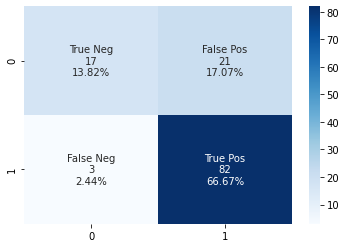

In [312]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(ytest, ypred))

cf_matrix=confusion_matrix(ytest, ypred)
           
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
                
    
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2) 
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


- Precision = TP / (TP + FP). This tells when you predict something positive, how many times they were actually positive.  
- Recall = TP / (TP + FN). This tells out of actual positive data, how many times you predicted correctly.

So this classifier has really good recall, and not so good precision:

- Out of the actual positive data, 96 % is correctly classified.
- However, the precision tells us that, out of predicted positive, only 80 % is actually positive. This means 20% of probability of defining loan eligible someone that is not.

Let's try to move the probability threshold to be harder when classifying a client as loan eligible. For that, let's use the precision and recall curve with the training set. Notice that this is done using StratifiedKFold to ensure that each fold is representative of all the data. Training data in each fold is used to determine the best threshold based on the f score. The mean value of these thresholds will be the chosen one:

In [313]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

Best_threshold = []

for train_index, test_index in skf.split(X_train, y_train):
    Xtrain, Xtest = X_train[train_index], X_train[test_index]
    ytrain, ytest = y_train[train_index], y_train[test_index]
    
    # predict probabilities
    yhat = model.predict_proba(Xtrain)
    # keep probabilities for the positive outcome only
    yhat = yhat[:, 1]
    # calculate pr-curve
    precision, recall, thresholds = precision_recall_curve(ytrain, yhat)
    
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    Best_threshold.append(thresholds[ix])
    print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
    

print('The best threshold mean value is: ', np.mean(Best_threshold))  

Best Threshold=0.792390, F-Score=0.932
Best Threshold=0.792390, F-Score=0.929
Best Threshold=0.792390, F-Score=0.915
Best Threshold=0.792390, F-Score=0.924
Best Threshold=0.794480, F-Score=0.924
The best threshold mean value is:  0.7928081299045566


In the following, we test this new threshold values in the test data of each fold, outputting the classification report:

In [314]:
for train_index, test_index in skf.split(X_train, y_train):
    Xtrain, Xtest = X_train[train_index], X_train[test_index]
    ytrain, ytest = y_train[train_index], y_train[test_index]
    
    y_proba = model.predict_proba(Xtrain)[:,1]
    threshold = np.mean(Best_threshold)
    ypred=(y_proba >= threshold).astype('int')
    print(classification_report(ytrain, ypred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       154
           1       0.92      0.94      0.93       337

    accuracy                           0.90       491
   macro avg       0.89      0.88      0.89       491
weighted avg       0.90      0.90      0.90       491

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       154
           1       0.90      0.95      0.93       337

    accuracy                           0.90       491
   macro avg       0.89      0.87      0.88       491
weighted avg       0.90      0.90      0.90       491

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       153
           1       0.89      0.94      0.91       338

    accuracy                           0.88       491
   macro avg       0.87      0.84      0.85       491
weighted avg       0.88      0.88      0.88       491

              preci

We can see how accuracy is increased (mean(accuracy) = 0.902), without decreasing much the recall (mean(recall) = 0.946). With this solution the bank have less risk of giving a loan to a non-eligible person, without losing potential clients.

Finally, lets see the feature importance in our classifier: 

<AxesSubplot:>

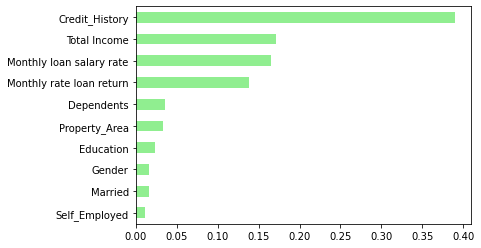

In [315]:
feature_importance = pd.Series(model.feature_importances_, index = train_processed.columns)
feature_importance.sort_values().plot(kind='barh', color = 'lightgreen')

We can see how the most important features when defining if a person is eligible or not for a loan are: 
- The credit history
- The total Income of the applicants
- The monthly loan salary rate
- The montly rate loan return

## Conclusions


The best model is  a Random Forest Classifier with the following values: 
- 'criterion' : gini
- 'class_weight': {1: 4},
- 'max_depth': 8,
- 'max_features': 'auto',
- 'n_estimators': 200
- Threshold : 0.7928

This give us an accuracy of 90 % and recall of 95% with the most important features being:

- The credit history
- The total Income of the applicants
- The monthly loan salary rate
- The montly rate loan return

In the following the model is used to determine which loan applicants in test_loan.csv are eligible, using this model:

We use the processed data: X_test

In [317]:
y_proba = model.predict_proba(X_test)[:,1]
threshold = np.mean(Best_threshold)
ypred=(y_proba >= threshold).astype('int')

The list of clients with their corresponding Loan Status.

In [318]:
LoanTest = pd.DataFrame()
LoanTest ['Loan Status'] = ypred
LoanTest['Loan_ID']  = test['Loan_ID']
LoanTest

,Loan Status,Loan_ID
0,1,LP001015
1,1,LP001022
2,1,LP001031
3,1,LP001035
4,1,LP001051
...,...,...
362,1,LP002971
363,1,LP002975
364,1,LP002980
365,1,LP002986


In [319]:
LoanTest ['Loan Status'].value_counts(normalize=True)

1    0.6703
0    0.3297
Name: Loan Status, dtype: float64

67% of the applicants result eligible for a loan. Notice how the proportion is similar to the one found in the training data.